# Ingeligencja obliczeniowa

**Projekt 5: Przestrzenie Ciągłe**   
Olgierd Piofczyk, Kaja Dzielnicka

---

## Środowisko: Pendulum-v1

W ramach projektu zastosowaliśmy środowisko `Pendulum-v1` z biblioteki `gym`. Jest to klasyczny problemem sterowania, w którym zadaniem agenta jest balansowanie wahadła w pionie, startując z dowolnej pozycji. Agent otrzymuje negatywne nagrody za odchylenia od pionu oraz za dużą prędkość kątową.

## Algorytm: SAC

SAC jest algorytmem wzmacniającego uczenia, który łączy metody aktora-krytyka z maksymalizacją entropii. Celem jest nie tylko maksymalizacja nagrody, ale także eksploracja różnych działań.

## Implementacja

### Instalacja środowiska

In [ ]:
import gymnasium as gym
import numpy as np
from stable_baselines3 import SAC
import matplotlib.pyplot as plt
import os

### Zdefiniowanie folderu do zapisywania wyników

In [ ]:
logs_dir = 'logs'
learning_algorithm = 'SAC'

if not os.path.exists(logs_dir):
    os.makedirs(logs_dir)

if not os.path.exists(learning_algorithm):
    os.makedirs(learning_algorithm)

### Metoda uczenia

In [ ]:
def train(env, name, max_iters=10, timesteps=50000, hyperparams={}):

    gamma_str = hyperparams.get("gamma") or "idk"
    log = f"{logs_dir}/2/SAC_{gamma_str}"
    model = SAC('MlpPolicy', env, verbose=1, tensorboard_log=log, **hyperparams)

    for iters in range(max_iters):
        model.learn(total_timesteps=timesteps, reset_num_timesteps=False)
        model.save(f'{learning_algorithm}/{name}_{timesteps*iters}')

### Metoda testowania

In [ ]:
def test(env, path_to_model):
    model = SAC.load(path_to_model)

    obs = env.reset()[0]
    done = False
    while True:
        action, _states = model.predict(obs)
        obs, _, done, _, _ = env.step(action)

        if done:
            break

### Definicja środowiska i trening agenta

In [ ]:
env = gym.make('Pendulum-v1', render_mode=None)
env_test = gym.make('Pendulum-v1', render_mode='human')

train(env, 1, 500)

test(env_test, 'SAC/{}0')

tu wykresy

tu coś o wynikach

## Eksperymenty z różnymi wartościami hiperparametrów

Przeprwoadziliśmy eksperymenty z różnymi wartościami hiperparametrów, aby sprawdzić, jak wpływają one na wyniki uczenia. Wybraliśmy trzy hiperparametry: `learning_rate`, `batch_size` oraz `gamma`. Dla każdego z nich przetestowaliśmy trzy różne wartości:

In [ ]:
hyperparameters = [
    {'learning_rate': 0.0003, 'batch_size': 256, 'gamma': 0.99},
    {'learning_rate': 0.0001, 'batch_size': 128, 'gamma': 0.95},
    {'learning_rate': 0.001, 'batch_size': 512, 'gamma': 0.9},
]

Następnie przeprowadziliśmy trening agenta dla każdej kombinacji hiperparametrów i zapisaliśmy wyniki. Poniżej przedstawiamy wykresy zależności wyników od wartości hiperparametrów.

In [ ]:

train(env, "batch256", 10, 50000, hyperparameters[0])
train(env, "batch128", 10, 50000, hyperparameters[1])
train(env, "batch512", 10, 50000, hyperparameters[2])

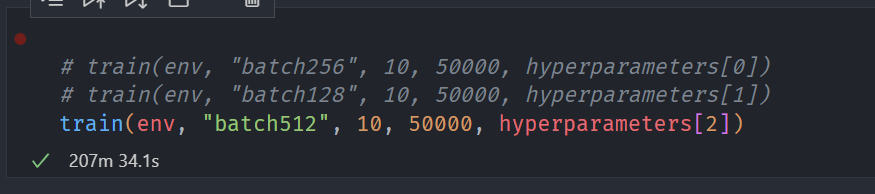

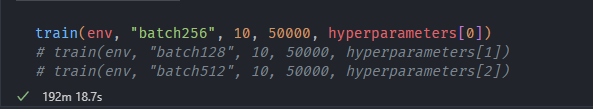

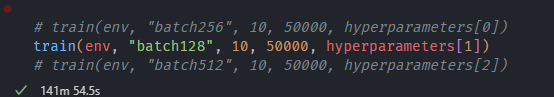

{'learning_rate': 0.0003, 'batch_size': 256, 'gamma': 0.99},
 czas: 192 min

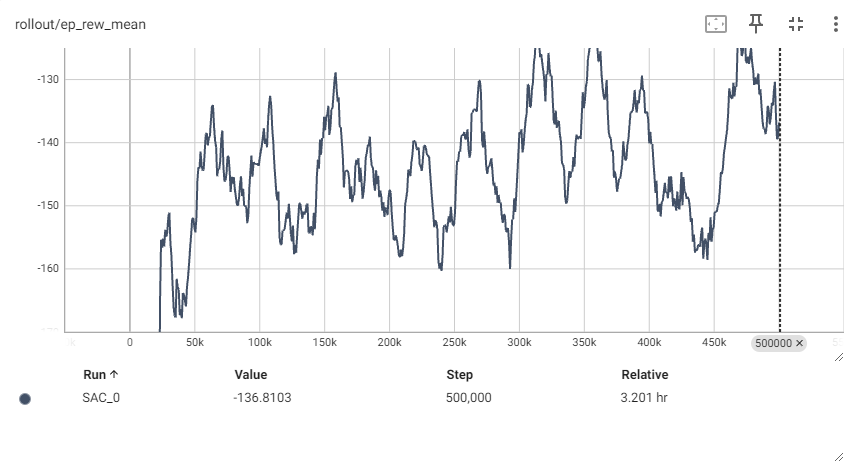

---

{'learning_rate': 0.0001, 'batch_size': 128, 'gamma': 0.95},

---

{'learning_rate': 0.001, 'batch_size': 512, 'gamma': 0.9},
czas: 207 min

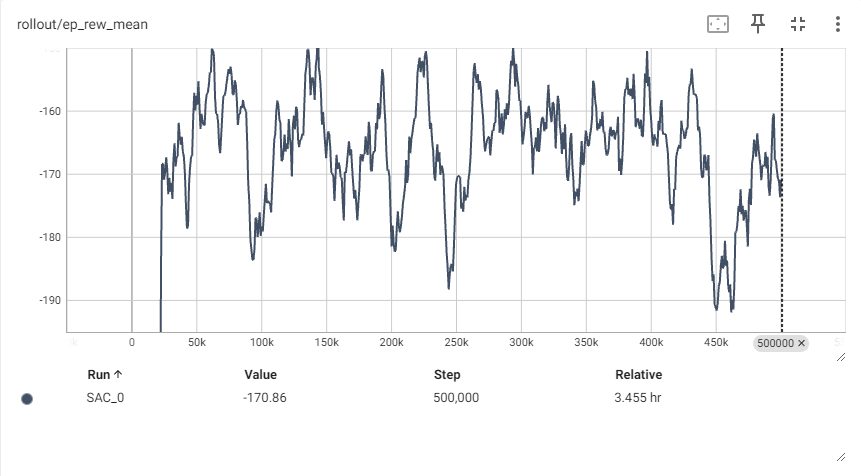

---



tu podsumowanie wyników